# 泰勒插值

一种**埃尔米特**插值

使用泰勒公式在$x_0$处展开得到多项式

$$
P_n(x)=\sum_{k=0}^{n} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^{k}
$$

## 例子

下面的例子是$e^x$和$ln(x)$的泰勒插值模拟

可以看到$e^x$在$x=0$出展开的泰勒级数的收敛域是$(-\infty, \infty)$，展开的次数$n$越大多项式函数越接近原函数

$ln(x)$在$x=1$时展开的泰勒级数的收敛域是$(0, 2]$，且随着$n$越大多项式函数在超出收敛域时会上下摆动


In [40]:
import sympy as sp

def taylor(_f, df, x0, n):

    def p(x):
        res = _f(x0)
        dd = 1   #阶乘
        w = 1

        for i in range(1, n + 1):
            dd *= i
            w *= (x - x0)
            df_res = df(i, x0)

            res += (df_res * w / dd)
            
        return res
            
    return p


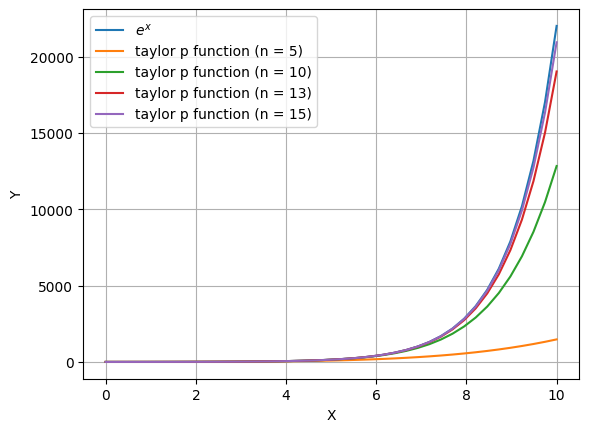

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 40)
y = np.exp(x)

plt.plot(x, y, '-', label=r'$e^x$')

def df(n, x0):
    return math.exp(x0)

p = taylor(math.exp, df, 0, 5)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 5)')

p = taylor(math.exp, df, 0, 10)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 10)')

p = taylor(math.exp, df, 0, 13)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 13)')

p = taylor(math.exp, df, 0, 15)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 15)')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

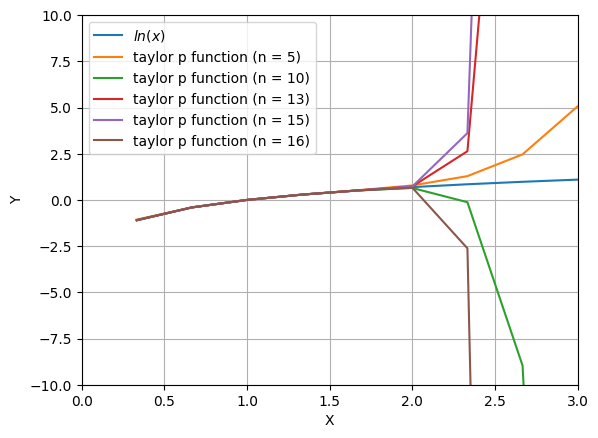

In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 10)[1:]
y = np.log(x)

x0 = 1

plt.plot(x, y, '-', label=r'$ln(x)$')

def df(n, x0):
    return (-1) ** (n - 1) * math.factorial(n - 1) / (x0 ** n)

p = taylor(math.log, df, x0, 5)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 5)')

p = taylor(math.log, df, x0, 10)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 10)')

p = taylor(math.log, df, x0, 13)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 13)')

p = taylor(math.log, df, x0, 15)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 15)')

p = taylor(math.log, df, x0, 16)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 16)')

plt.ylim(-10, 10)
plt.xlim(0, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()